# Exercise 1

## 1.1

In [1]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
download(url, "covid_data.csv")

"covid_data.csv"

In [2]:
using CSV, DataFrames
data = CSV.read("covid_data.csv")
rename!(data, 1 => "province", 2 => "country")


,province,country,Lat,Long,1/22/20
,String⍰,String,Float64,Float64,Int64
1,missing,Afghanistan,33.0,65.0,0
2,missing,Albania,41.1533,20.1683,0
3,missing,Algeria,28.0339,1.6596,0
4,missing,Andorra,42.5063,1.5218,0
5,missing,Angola,-11.2027,17.8739,0
6,missing,Antigua and Barbuda,17.0608,-61.7964,0
7,missing,Argentina,-38.4161,-63.6167,0
8,missing,Armenia,40.0691,45.0382,0
9,Australian Capital Territory,Australia,-35.4735,149.012,0


In [3]:
all_countries = data[:,2]

262-element WeakRefStrings.StringArray{String,1}:
 "Afghanistan"
 "Albania"
 "Algeria"
 "Andorra"
 "Angola"
 "Antigua and Barbuda"
 "Argentina"
 "Armenia"
 "Australia"
 "Australia"
 "Australia"
 "Australia"
 "Australia"
 ⋮
 "United Kingdom"
 "United Kingdom"
 "MS Zaandam"
 "Botswana"
 "Burundi"
 "Sierra Leone"
 "Netherlands"
 "Malawi"
 "United Kingdom"
 "France"
 "South Sudan"
 "Western Sahara"

## 1.2

In [4]:
countries = vec(["China", "Japan", "Korea, South", "US", "United Kingdom", "France", "Germany"])

7-element Array{String,1}:
 "China"
 "Japan"
 "Korea, South"
 "US"
 "United Kingdom"
 "France"
 "Germany"

## 1.3

In [5]:
num_days = length(data[1,5:end])

75

## 1.4

In [6]:
allData = Dict()

for country in countries #loop through each country
    countryData = zeros(num_days) #initialize vector for country
    matchingCountries = [c == country for c in data[:,2]]
    d = data[matchingCountries,:] #df for this country that contains the rows with its territories 
    
    for i in 1:length(d[!,1]) #loop through each row of the territories df
        countryData += vec(convert(Array, d[i, 5:end])) #add data to vector
    end
    
    allData[country] = countryData
end


## 1.5

In [7]:
using Dates
date_strings = String.(names(data))[5:end]
dates = parse.(Date, date_strings, Dates.DateFormat("m/d/Y")) .+ Year(2000)

75-element Array{Date,1}:
 2020-01-22
 2020-01-23
 2020-01-24
 2020-01-25
 2020-01-26
 2020-01-27
 2020-01-28
 2020-01-29
 2020-01-30
 2020-01-31
 2020-02-01
 2020-02-02
 2020-02-03
 ⋮
 2020-03-25
 2020-03-26
 2020-03-27
 2020-03-28
 2020-03-29
 2020-03-30
 2020-03-31
 2020-04-01
 2020-04-02
 2020-04-03
 2020-04-04
 2020-04-05

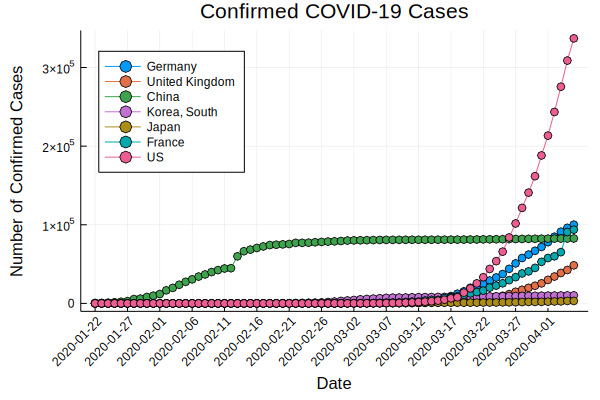

In [8]:
using Plots
p = plot()

for country in keys(allData)
    plot!(p, dates, allData[country], xticks=dates[1:5:end], xrotation=45, label=country, leg=:topleft, m=:o)
end
xlabel!("Date")
ylabel!("Number of Confirmed Cases")
title!("Confirmed COVID-19 Cases")
p

## 1.6

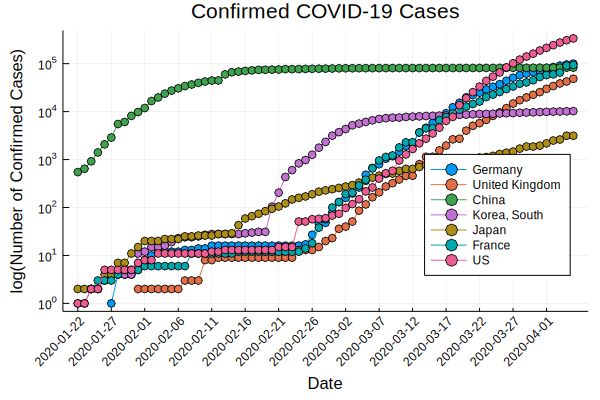

In [9]:
allDataNan = deepcopy(allData)

for country in keys(allDataNan)
    replace!(allDataNan[country], 0.0 => NaN)
end

p = plot()
for country in keys(allDataNan)
    plot!(p, dates, allDataNan[country], label=country, xticks=dates[1:5:end], xrotation=45, 
        leg=:bottomright, m=:o, yscale=:log10)
end
xlabel!("Date")
ylabel!("log(Number of Confirmed Cases)")
title!("Confirmed COVID-19 Cases")
p

There is exponential growth for most countries starting from around day 37 -- those with a near-linear curve display exponential growth. For countries like China, though, this exponential growth starts at the beginning of the time period and tapers off around day 21. 

## 1.7

In [10]:
using Interact
@manipulate for day in 1:num_days
    p=plot(xticks = dates[1:5:day], xrotation=45, leg=:bottomright)
    xlabel!("Date")
    ylabel!("log(Number of Confirmed Cases)")
    title!("Confirmed COVID-19 Cases")
    for country in keys(allData)
        plot!(dates[1:day], allDataNan[country][1:day], label=country, yscale=:log10, m=:o)   
    end
    cur_xlims=(dates[1], dates[end])  
    xlims!(map(Dates.value, cur_xlims))
    p
end


HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-689392037430259837\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-12941448708588085741\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-689392037430259837\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["day"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 75,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
38, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/lydiayu/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/lydiayu/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/lydiayu/.julia/packages/InteractBase/NMcus/src/../assets/all.js"), Asset("css", nothing, "/Users/lydiayu/.julia/packages/InteractBase/NMcus/src/../assets/style.css"), Asset("css", nothing, "/Users/lydiayu/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000001347af3d0, Task (runnable) @0x00000001347af3d0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",

# Exercise 2

## 2.1

In [11]:
total_cases_to_date = allData

Dict{Any,Any} with 7 entries:
  "Germany"        => [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 4.0, 4.0, 4.0, 5.0  …  508…
  "United Kingdom" => [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0  …  147…
  "China"          => [548.0, 643.0, 920.0, 1406.0, 2075.0, 2877.0, 5509.0, 608…
  "Korea, South"   => [1.0, 1.0, 2.0, 2.0, 3.0, 4.0, 4.0, 4.0, 4.0, 11.0  …  93…
  "Japan"          => [2.0, 2.0, 2.0, 2.0, 4.0, 4.0, 7.0, 7.0, 11.0, 15.0  …  1…
  "France"         => [0.0, 0.0, 2.0, 3.0, 3.0, 3.0, 4.0, 5.0, 5.0, 5.0  …  334…
  "US"             => [1.0, 1.0, 2.0, 2.0, 5.0, 5.0, 5.0, 5.0, 5.0, 7.0  …  101…

## 2.2

In [12]:
new_cases = Dict()

for country in keys(total_cases_to_date)
    cases = zeros(num_days)
    for i in 1:6 #leave first 6 days at existing values
        cases[i] += total_cases_to_date[country][i]
    end
    
    for i in 7:num_days #each entry = sum of prev 7 days
        cases[i] = sum(cases[x] for x in i-6:i)
    end
    new_cases[country] = cases
end

## 2.3

In [13]:
@manipulate for day in 1:num_days
    plot(total_cases_to_date["China"][1:day], new_cases["China"][1:day], 
        xlim = (0, total_cases_to_date["China"][num_days]), label="China", yscale=:log10)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["day"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 75,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
38, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/lydiayu/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/lydiayu/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/lydiayu/.julia/packages/InteractBase/NMcus/src/../assets/all.js"), Asset("css", nothing, "/Users/lydiayu/.julia/packages/InteractBase/NMcus/src/../assets/style.css"), Asset("css", nothing, "/Users/lydiayu/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000133f8b190, Task (runnable) @0x0000000133f8b190), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",

In [29]:
for country in keys(new_cases)
    replace!(new_cases[country], 0.0 => NaN)
end

@manipulate for day in 1:num_days
    p=plot(leg=:bottomright)
    xlabel!("Total Confirmed Cases")
    ylabel!("log(Number of New Confirmed Cases, past week)")
    title!("Confirmed COVID-19 Cases")
    for country in keys(new_cases)
        plot!(total_cases_to_date[country][1:day], (new_cases[country][1:day]),
            xlim = (0, total_cases_to_date[country][num_days]), label=country, yscale=:log10, m=:o)   
    end
    p
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["day"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 75,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
38, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/lydiayu/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/lydiayu/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/lydiayu/.julia/packages/InteractBase/NMcus/src/../assets/all.js"), Asset("css", nothing, "/Users/lydiayu/.julia/packages/InteractBase/NMcus/src/../assets/style.css"), Asset("css", nothing, "/Users/lydiayu/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000138c7ead0, Task (runnable) @0x0000000138c7ead0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",

## 2.4

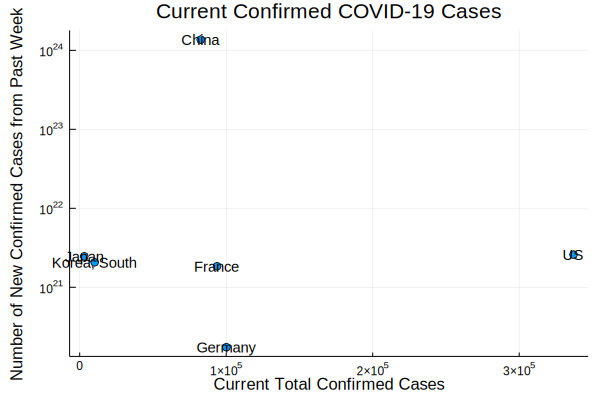

In [36]:
curr_confirmed_cases = zeros(length(countries))
curr_change = zeros(length(countries))
i = 1
for country in keys(new_cases)
    curr_confirmed_cases[i] = total_cases_to_date[country][num_days]
    curr_change[i] = new_cases[country][num_days]
    i+=1
end

s = scatter(curr_confirmed_cases, curr_change, leg=:none, m=:o, yscale=:log10)
xlabel!("Current Total Confirmed Cases")
ylabel!("Number of New Confirmed Cases from Past Week")
title!("Current Confirmed COVID-19 Cases")
for country in keys(new_cases)
    #scatter!(total_cases_to_date[country], log10.(new_cases[country]), label=country, m=:o)
    annotate!(total_cases_to_date[country][num_days], new_cases[country][num_days], 
        text(country, 10, :black))
end
s